In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import floor
from pathlib import Path
import json

__rows = 1
__cols = 1


def sb_init(rows, cols):
    plt.figure(figsize=[cols*5, rows*4])
    global __rows
    global __cols
    __rows = rows
    __cols = cols
    return plt.subplot(rows, cols, 1)


def sb(x, y):
    return plt.subplot(__rows, __cols, x + (y - 1) * __cols)


In [99]:
# Load data

p = Path('./')
dirs = [f for f in p.iterdir() if f.is_dir()]
data = []

for d in dirs:
    item = {}
    temp = np.loadtxt(d / 'corr_func_avg_d.txt')
    item['x'] = temp[:, 0]
    item['avg_d'] = temp[:, 1]
    temp = np.loadtxt(d / 'corr_func_avg_h.txt')
    item['avg_h'] = temp[:, 1]
    details = (d / 'details.txt').read_text()
    if details[0] == 'S':
        # Old version without JSON formatting
        details = details.replace('\n', ', ') \
                         .replace("Side", "{\"side\"") \
                         .replace("Defects frac", "\"defects_frac\"") \
                         .replace("Gamma", "\"gamma\"") \
                         .replace("Replies", "\"replies\"") \
                         .replace("Corr. Range", "\"corr_range\"")
        details = details[:-2] + " }"
    item.update(json.loads(details))
    data.append(item)

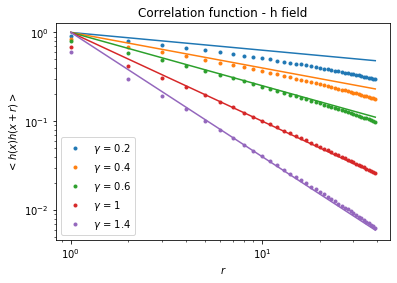

In [100]:
lims = [1, 30]
defects_frac = 0.3

xp = data[0]["x"][1:]

for i in data:
    if i["defects_frac"] == defects_frac:
        a1 = plt.loglog( i["x"], i["avg_h"], '.', label= r"$\gamma$ = " + str(i["gamma"] ))
        
        plt.loglog( xp, np.power( xp, -i["gamma"]), '-', color = a1[0].get_color(), label= "_hidden" )

plt.legend();

plt.title("Correlation function - h field");
plt.xlabel(r"$r$");
plt.ylabel(r"$<h(x)h(x+r)>$");

plt.savefig( "CF_h.pdf" )

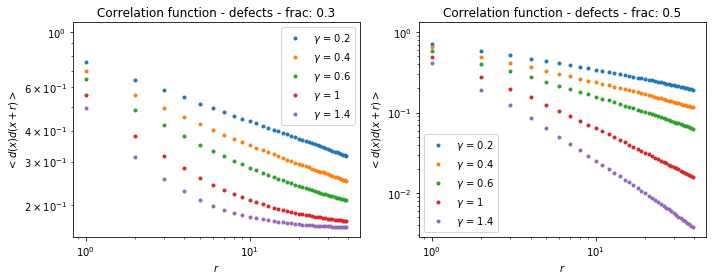

In [104]:
lims = [1, 30]
defects_fracs_list = np.sort( np.unique([i["defects_frac"] for i in data ]) )
gamma_list = np.sort( np.unique([i["gamma"] for i in data ]) )
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
pl = []

pl.append( sb_init( 1, len(defects_fracs_list) ) )
for i in range(1,len(defects_fracs_list)):
    pl.append( sb( i+1 , 1 ) )

xp = data[0]["x"][1:]

for i in data:
    df_i = np.where( defects_fracs_list==i["defects_frac"] )[0][0]
    gamma_i = np.where( gamma_list==i["gamma"])[0][0]

    pl[ df_i ].loglog( i["x"], i["avg_d"], '.', color= color_list[ gamma_i ], label= r"$\gamma$ = " + str(i["gamma"] ))
    # pl[ df_i ].loglog( xp, np.power( xp, -i["gamma"]), '-', color = color_list[ gamma_i ], label= "_hidden" )

for i in range(0,len(defects_fracs_list)):
    pl[i].legend();
    pl[i].set_title("Correlation function - defects - frac: " + str( defects_fracs_list[i] ));
    pl[i].set_xlabel(r"$r$");
    pl[i].set_ylabel(r"$<d(x)d(x+r)>$");

plt.tight_layout()

plt.savefig( "CF_d.pdf" )